In [69]:
import numpy as np
import gdal
import matplotlib.pyplot as plt
import os
import pandas as pd
import datetime
%matplotlib inline

In [6]:
# read all band images in a directory
images = {}
image_dir = 'earthengine_images/'
for fn in os.listdir(image_dir):
    raw = gdal.Open(image_dir + fn)
    arr = raw.ReadAsArray()
    images[fn.split('.')[0]] = arr

In [7]:
for k, v in images.items():
    print(k + ' ' + str(v.shape))

LC80930862015264 (3, 117, 311)
LC80930862015072 (3, 117, 311)
LC80930862015152 (3, 117, 311)
LC80930862015088 (3, 117, 311)
LC80930862015184 (3, 117, 311)
LC80930862015232 (3, 117, 311)
LC80940862015319 (3, 117, 311)
LC80940862015207 (3, 117, 311)
LC80940862015159 (3, 117, 311)
LC80940862015191 (3, 117, 311)
LC80940862015095 (3, 117, 311)
LC80940862015079 (3, 117, 311)
LC80930862016091 (3, 117, 311)
LC80940862015271 (3, 117, 311)
LC80930862016011 (3, 117, 311)
LC80930862015280 (3, 117, 311)
LC80940862015303 (3, 117, 311)
LC80930862016027 (3, 117, 311)
LC80930862016059 (3, 117, 311)
LC80930862015344 (3, 117, 311)
LC80930862015168 (3, 117, 311)
LC80940862016034 (3, 117, 311)
LC80930862015200 (3, 117, 311)
LC80930862016043 (3, 117, 311)
LC80940862015175 (3, 117, 311)
LC80940862015255 (3, 117, 311)
LC80940862015239 (3, 117, 311)
LC80930862015296 (3, 117, 311)
LC80930862015136 (3, 117, 311)
LC80940862015127 (3, 117, 311)
LC80940862016002 (3, 117, 311)
LC80940862016082 (3, 117, 311)
LC809308

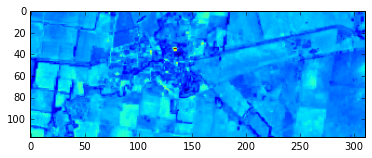

In [8]:
plt.imshow(images['LC80930862015040'][2, :, :])
plt.show()

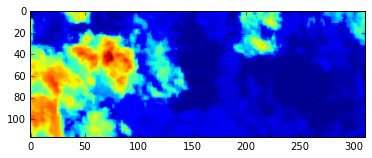

In [9]:
plt.imshow(images['LC80940862015079'][2, :, :])
plt.show()

In [10]:
# read all mask images in a directory
masks = {}
mask_dir = 'earthengine_masks/'
for fn in os.listdir(mask_dir):
    raw = gdal.Open(mask_dir + fn)
    arr = raw.ReadAsArray()
    masks[fn.split('.')[0]] = arr

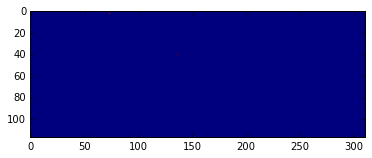

In [11]:
plt.imshow(masks['LC80930862015040'][0, :, :])
plt.show()

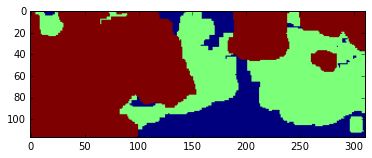

In [12]:
plt.imshow(masks['LC80940862015079'][0, :, :])
plt.show()

In [13]:
# compose band and mask images into one image
combined = {}
image_dir = 'earthengine_images/'
mask_dir = 'earthengine_masks/'
for fn in os.listdir(image_dir):
    raw_img = gdal.Open(image_dir + fn)
    arr_img = raw_img.ReadAsArray()
    raw_msk = gdal.Open(mask_dir + fn)
    arr_msk = raw_msk.ReadAsArray()
    combined[fn.split('.')[0]] = np.concatenate((arr_img, arr_msk), axis=0)

In [14]:
print(combined['LC80940862015079'].shape)

(5, 117, 311)


In [15]:
# use image names to look up metadata from csv export
table = pd.read_csv('earthengine_tables/LC8_SR.csv')
time_start = table[['system:index', 'system:time_start']]

In [46]:
time_start

,system:index,system:time_start
0,LC80930862015040,1423440571231
1,LC80930862015056,1424822966175
2,LC80930862015072,1426205354132
3,LC80930862015088,1427587746370
4,LC80930862015120,1430352533188
5,LC80930862015136,1431734919028
6,LC80930862015152,1433117325195
7,LC80930862015168,1434499736147
8,LC80930862015184,1435882143244
9,LC80930862015200,1437264552573


In [18]:
time_start[time_start['system:index'] == 'LC80930862015040'].ix[0, 1]

1423440571231

In [19]:
# compose all data into a single data frame
ds = {}
for k, v in combined.items():
    ts = time_start[time_start['system:index'] == k]['system:time_start'].iloc[0]
    ds[ts] = v

In [20]:
print(ds.keys())

dict_keys([1440634536577, 1442016943362, 1459382957827, 1445558982533, 1458000568200, 1433117325195, 1435882143244, 1440029363213, 1428192911630, 1433722502125, 1426205354132, 1453853382683, 1424822966175, 1442794176672, 1449706184998, 1448928958023, 1452470982577, 1454458551604, 1450311357239, 1423440571231, 1436487319228, 1441411768125, 1424045737534, 1439252129269, 1427587746370, 1451088586307, 1430352533188, 1448323787335, 1438646955592, 1426810523472, 1434499736147, 1447546555861, 1444781749463, 1458605735131, 1429575310943, 1446164155488, 1451693755106, 1446941385063, 1430957695975, 1444176579436, 1457223342061, 1437869725294, 1455235776496, 1456618171987, 1431734919028, 1435104908414, 1432340092546, 1443399349500, 1437264552573, 1453076154238])


In [21]:
# getting ready for interpolation / training

In [101]:
# get time series at a point
def getTS(data, x, y):
    times = list(data.keys())
    times.sort()
    ts = dict(map(lambda t: (t, data[t][:, x, y]), times))
    df = pd.DataFrame(ts).transpose()
    df['date'] = df.index.map(lambda t: str(datetime.datetime.fromtimestamp(t/1000).date()))
    return df

In [102]:
df = getTS(ds, 20, 30)
df

,0,1,2,3,4,date
1423440571231,1908,1140,833,0,1,2015-02-09
1424045737534,2214,1203,854,2,1,2015-02-16
1424822966175,8770,8161,7738,4,3,2015-02-25
1426205354132,1495,884,595,4,3,2015-03-13
1426810523472,2080,1265,914,4,1,2015-03-20
1427587746370,2065,1229,865,0,1,2015-03-29
1428192911630,6130,5782,5672,4,3,2015-04-05
1429575310943,3571,2966,2884,4,3,2015-04-21
1430352533188,1808,1008,687,0,1,2015-04-30
1430957695975,3759,3022,2872,4,3,2015-05-07


cfmask: cloud mask.

    0=clear
    1=water
    2=shadow
    3=snow
    4=cloud

cfmask_conf: cloud mask confidence

    0=none
    1=cloud confidence ≤ 12.5%
    2=cloud confidence > 12.5% and ≤ 22.5%
    3=cloud confidence > 22.5%

In [103]:
def selectClear(df, level=1):
    return df.ix[(df.ix[:, 3] == 0) & (df.ix[:, 4] <= level), [0, 1, 2, 'date']]

In [104]:
clear = selectClear(df, 1)
clear

,0,1,2,date
1423440571231,1908,1140,833,2015-02-09
1427587746370,2065,1229,865,2015-03-29
1430352533188,1808,1008,687,2015-04-30
1431734919028,1306,571,422,2015-05-16
1433117325195,923,249,216,2015-06-01
1437264552573,3093,166,304,2015-07-19
1444176579436,4782,153,313,2015-10-07
1444781749463,4198,186,319,2015-10-14
1445558982533,3989,273,377,2015-10-23
1446941385063,2987,597,578,2015-11-08


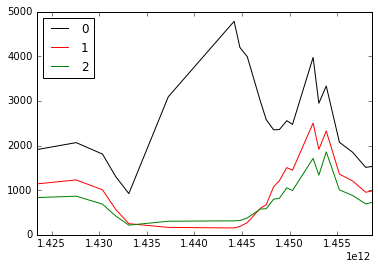

In [100]:
clear.plot(color=['k', 'r', 'g'])

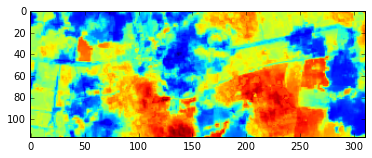

In [65]:
plt.imshow(ds[1444176579436][0, :, :])
plt.show()

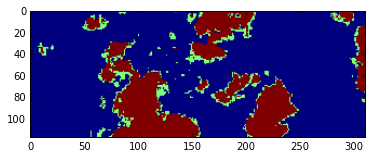

In [66]:
plt.imshow(ds[1444176579436][4, :, :])
plt.show()

In [76]:
str(datetime.datetime.fromtimestamp(1444176579436/1000).date())

'2015-10-07'